In [1]:
!pip install seaborn statsmodels --quiet


In [2]:
!pip install nsepy --quiet


  DEPRECATION: Building 'nsepy' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'nsepy'. Discussion can be found at https://github.com/pypa/pip/issues/6334


In [3]:
#Probabilty & statistics

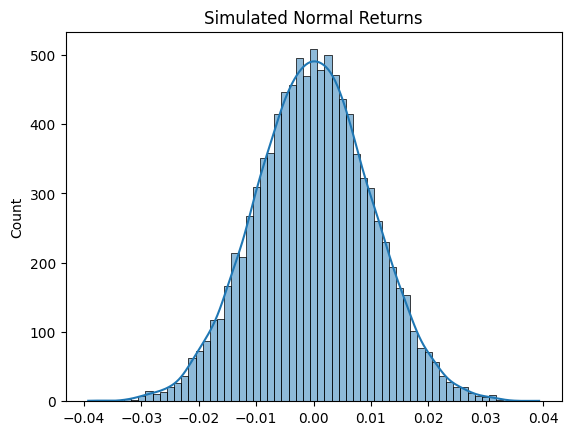

Mean: -2.135983368426211e-05
Std Dev: 0.010034122061299876
Skewness: 0.0019636977663562444
Kurtosis: 0.026479272360443673


In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Simulate returns
np.random.seed(42)
returns = np.random.normal(0, 0.01, 10000)

# Histogram and PDF
sns.histplot(returns, kde=True)
plt.title("Simulated Normal Returns")
plt.show()

# Moments
print("Mean:", np.mean(returns))
print("Std Dev:", np.std(returns))
print("Skewness:", stats.skew(returns))
print("Kurtosis:", stats.kurtosis(returns))


In [5]:
#Time Series & Stationarity

ADF Statistic: -72.3761893812494
p-value: 0.0


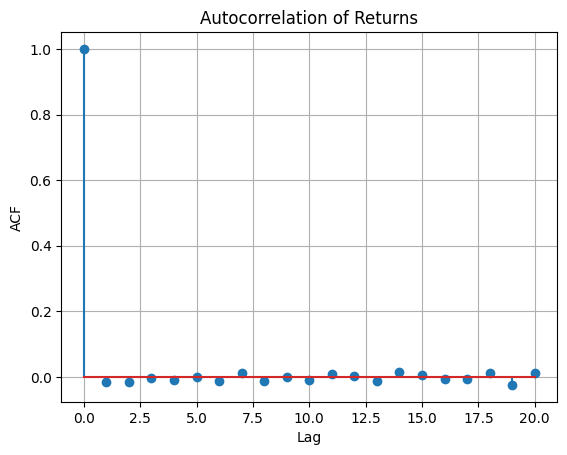

In [16]:
from statsmodels.tsa.stattools import adfuller, acf, pacf

# Generate non-stationary price series
prices = np.cumsum(returns)
log_returns = np.diff(np.log(prices + 100))

# ADF Test
result = adfuller(log_returns)
print("ADF Statistic:", result[0])
print("p-value:", result[1])

# ACF plot
# Replace this line:
# plt.stem(acf(log_returns, nlags=20), use_line_collection=True)

# With this:
plt.stem(acf(log_returns, nlags=20))
plt.title("Autocorrelation of Returns")
plt.xlabel("Lag")
plt.ylabel("ACF")
plt.grid(True)
plt.show()



In [7]:
#Volatility Measures

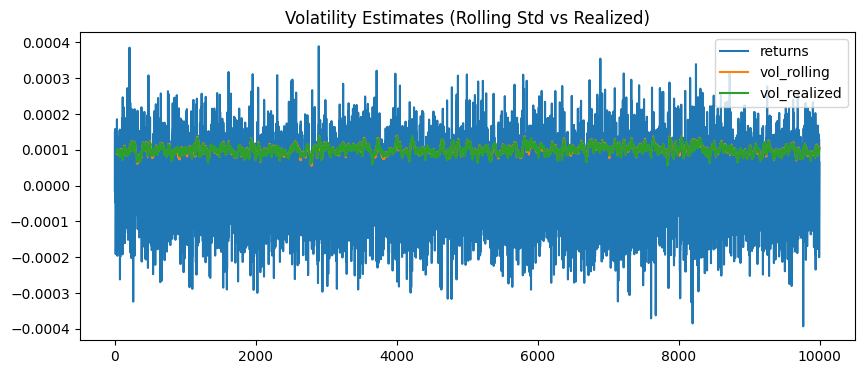

In [8]:
import pandas as pd

df = pd.DataFrame({'returns': log_returns})
df['vol_rolling'] = df['returns'].rolling(30).std()
df['vol_realized'] = df['returns'].pow(2).rolling(30).mean().apply(np.sqrt)

df.plot(title="Volatility Estimates (Rolling Std vs Realized)", figsize=(10,4))
plt.show()


In [10]:
#Correlation and Cointegration

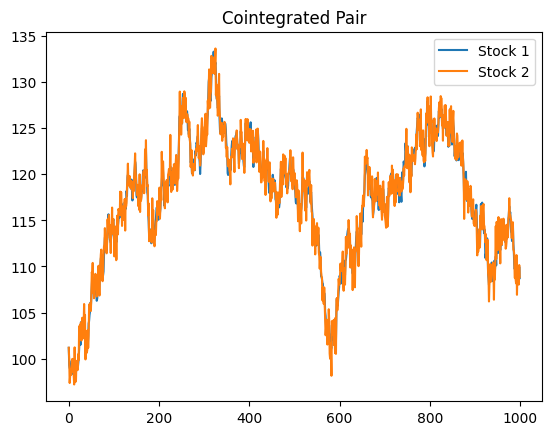

Pearson Correlation: 0.9890469265086348
ADF on Spread: 0.0


In [11]:
# Simulate two cointegrated price series
p1 = np.cumsum(np.random.normal(0, 1, 1000)) + 100
spread = np.random.normal(0, 1, 1000)
p2 = p1 + spread

plt.plot(p1, label="Stock 1")
plt.plot(p2, label="Stock 2")
plt.title("Cointegrated Pair")
plt.legend()
plt.show()

# Correlation
print("Pearson Correlation:", np.corrcoef(p1, p2)[0, 1])

# ADF test on spread
spread = p1 - p2
print("ADF on Spread:", adfuller(spread)[1])


In [12]:
#Statistical Testing

In [13]:
# Hurst Exponent (for mean-reversion vs trending)
def hurst(ts):
    lags = range(2, 100)
    tau = [np.std(np.subtract(ts[lag:], ts[:-lag])) for lag in lags]
    poly = np.polyfit(np.log(lags), np.log(tau), 1)
    return 2.0 * poly[0]

print("Hurst Exponent (should be < 0.5 for mean reversion):", hurst(prices))


Hurst Exponent (should be < 0.5 for mean reversion): 1.0306982156884081


In [14]:
#Risk Metrics

In [15]:
def sharpe(returns, rf=0.0):
    excess = returns - rf
    return np.mean(excess) / np.std(excess)

def value_at_risk(returns, level=0.05):
    return np.quantile(returns, level)

print("Sharpe Ratio:", sharpe(log_returns) * np.sqrt(252))  # annualized
print("VaR 5%:", value_at_risk(log_returns, 0.05))


Sharpe Ratio: -0.03467410250454758
VaR 5%: -0.0001644776509325929
